# Introduction To Deep Learning

Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. 

Deep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.

Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic and analog.

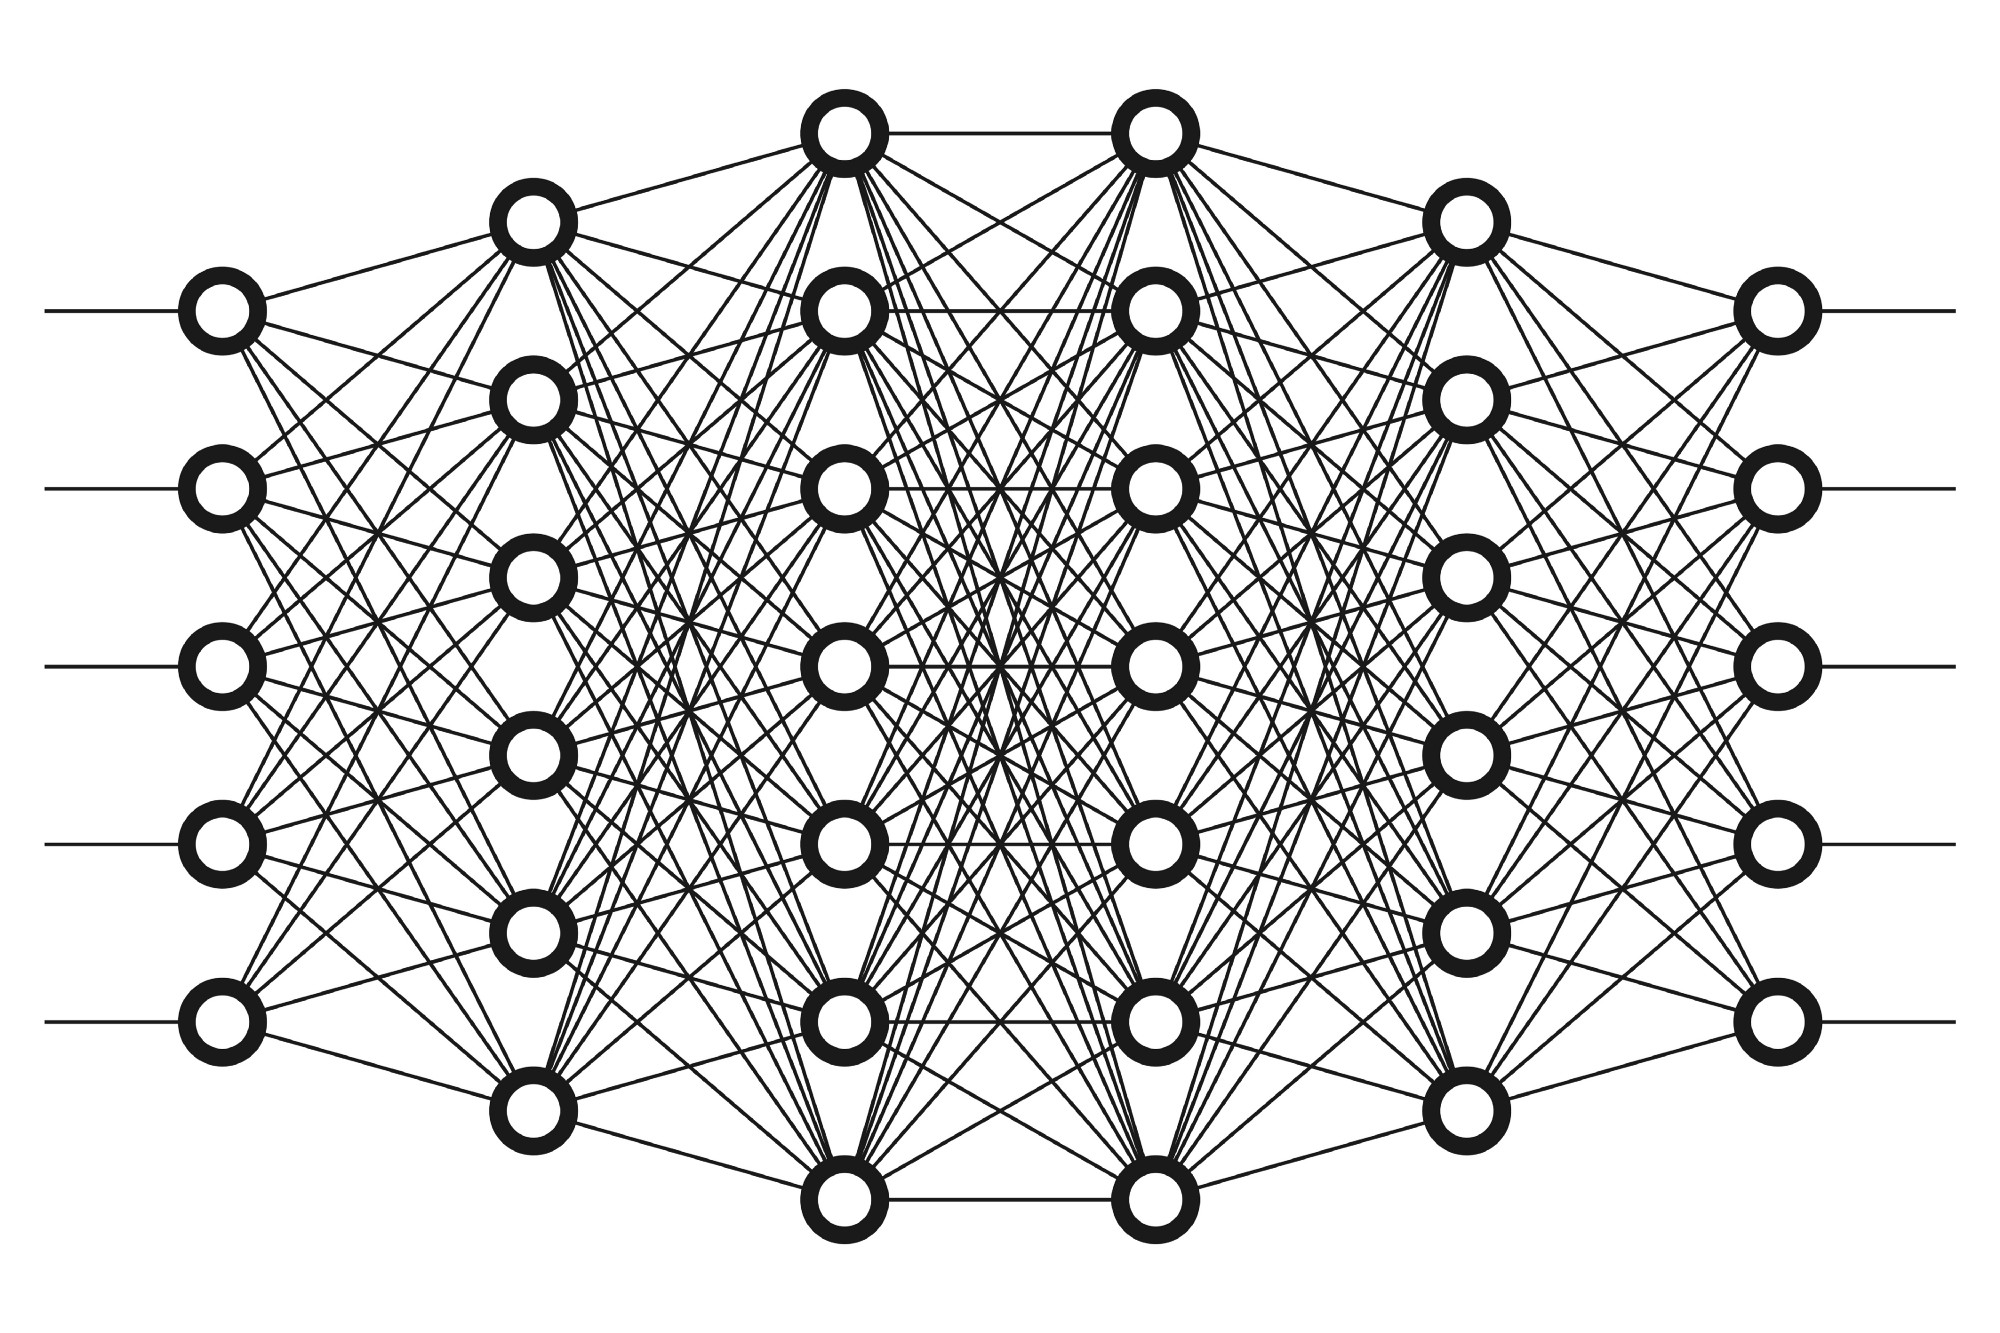

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ann1.jpeg",width=500, height=500)

But what is the main difference between Deep Learning and Machine Learning?

- Deep Learning uses multiple layers, each applying/learning his own transformation.
- Deep Learning learns multiple level of representation of the data.

The first one means, that one will design different parts - layers - of his neural network to learn different things. This is a difference with vanilla neural networks that just stack the same layer.

This make the second point possible, and this is why deep learning rocks. We manage to learn different level of representation of data thanks to multiple somehow specialized layers.

Level of representation? Don’t like the term? Well, in other words, if you have a picture as an input, you can imagine you want to recognize:

- basic shapes
- items
- colors

If you have a text, you wan’t to learn

- syntax
- semantic 
- grammar
- etc 


In deep learning, each level learns to transform its input data into a slightly more abstract and composite representation. In an image recognition application, the raw input may be a matrix of pixels; the first representational layer may abstract the pixels and encode edges; the second layer may compose and encode arrangements of edges; the third layer may encode a nose and eyes; and the fourth layer may recognize that the image contains a face. Importantly, a deep learning process can learn which features to optimally place in which level on its own. (Of course, this does not completely eliminate the need for hand-tuning; for example, varying numbers of layers and layer sizes can provide different degrees of abstraction.)

Classifying those kind of features oftenly non-linear. Some of Machine Learning algorithms ;like Kernel Support Vector Machines, Random Forest, KNN, are able to learn non-linear features of data. But in various tasks, Artificial Neural Networks are more effective.

What does 'non-linear' mean? We have seen Logistic Regression classifier. Logistic Regression classifier is a linear classifier as seen:

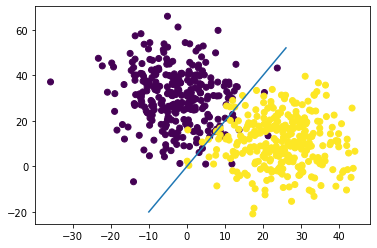

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x_1 = np.concatenate([np.random.normal(-3, 8, 300),np.random.normal(25, 9, 300)])
x_2 = np.concatenate([np.random.normal(30, 13, 300), np.random.normal(11, 11, 300)])
y = np.concatenate([np.zeros(300),np.ones(300)])
df = pd.DataFrame({'x_1':x_1,'x_2':x_2,'y':y})
plt.scatter(df['x_1'],df['x_2'],c=df['y']);
plt.plot(np.array([point for point in range(-10,27)]),2*np.array([point for point in range(-10,27)]));

Let's see a non-linear data classifier.

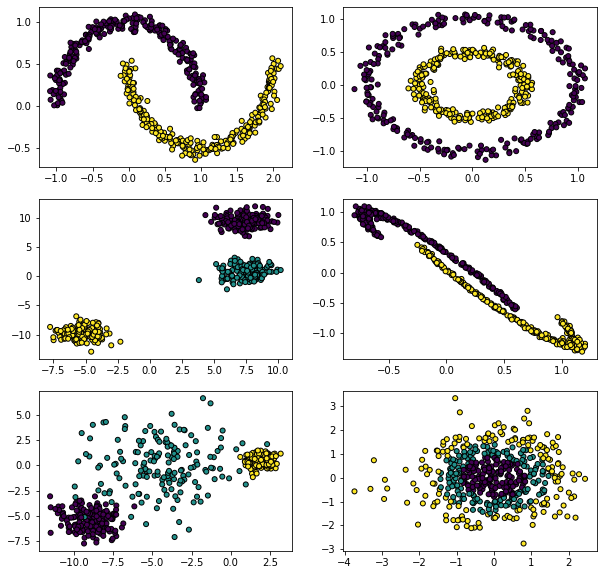

In [56]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt

n_samples = 500
X_noisy_circles, Y_noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
X_noisy_moons, Y_noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X_blobs, Y_blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_noisy_moons, transformation)
Y_aniso = Y_noisy_moons.copy()

X_varied, Y_varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)
X_gaussv, Y_gaussv = datasets.make_gaussian_quantiles(n_samples=n_samples)

fig, axs = plt.subplots(3, 2,figsize=(10,10))
axs[0,0].scatter(X_noisy_moons[:, 0], X_noisy_moons[:, 1], marker='o', c=Y_noisy_moons,
            s=25, edgecolor='k');
#ax = plt.subplot(2,4,2)
axs[0,1].scatter(X_noisy_circles[:, 0], X_noisy_circles[:, 1], marker='o', c=Y_noisy_circles,
            s=25, edgecolor='k');
#ax = plt.subplot(2,4,3)
axs[1,0].scatter(X_blobs[:, 0], X_blobs[:, 1], marker='o', c=Y_blobs,
            s=25, edgecolor='k');
#ax = plt.subplot(2,4,4)
axs[1,1].scatter(X_aniso[:, 0], X_aniso[:, 1], marker='o', c=Y_aniso,
            s=25, edgecolor='k');

axs[2,0].scatter(X_varied[:, 0], X_varied[:, 1], marker='o', c=Y_varied,
            s=25, edgecolor='k');

axs[2,1].scatter(X_gaussv[:, 0], X_gaussv[:, 1], marker='o', c=Y_gaussv,
            s=25, edgecolor='k');

## Single Layer Perceptrons

A single layer perceptron is base architecture behind deep learning model, it can be seen as a shallow neural network.

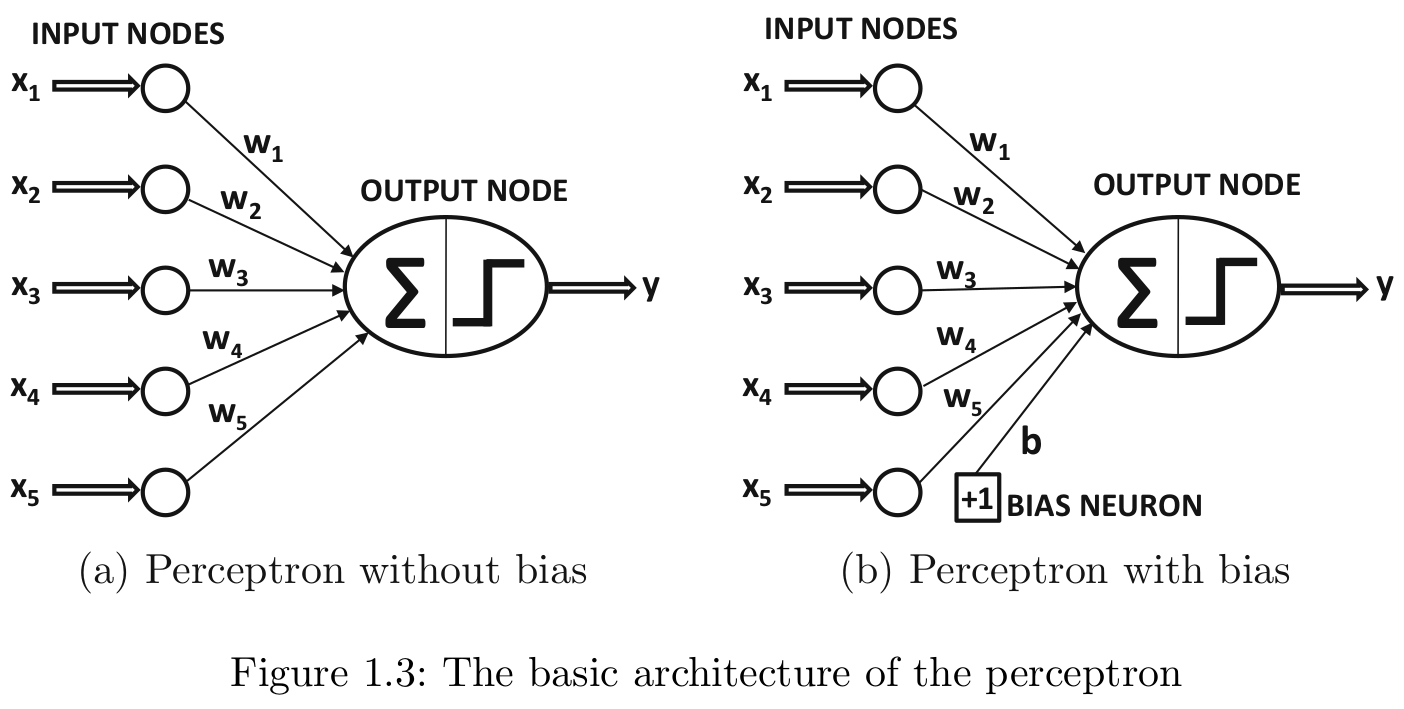

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/perceptron1.png",width=700, height=700)

Let's see how to compute output from input.

The input matrix is defined as:

$$ X = 
    \begin{bmatrix}
    x_1^{1} & x_2^{1} & \cdots & x_n^{1}\\
    x_1^{2} & x_2^{2} & \cdots & x_n^{2} \\
    \vdots & \vdots & \cdots & \vdots \\
    x_1^{m} & x_2^{m} & \cdots & x_n^{m}
    \end{bmatrix}\;\;\;
    \in \mathbb{R^{m \times n}}
$$

And the weight matrix is defined as:

$$ w = 
    \begin{bmatrix}
    w_1\\
    w_2\\
    \vdots \\
    w_n
    \end{bmatrix}\;\;\;
    \in \mathbb{R^{n \times 1}}
$$

and the loss function defined as:

$$ L(\hat{y},y) = \frac{1}{2m}\sum(y - \hat{y})^2 $$

to calculate the output, we need to do a matrix multiplication over input matrix and weight matrix, then add the bias term.

$$ X w = \begin{bmatrix} x_1^{1} & x_2^{1} & \cdots & x_n^{1}\\  x_1^{2} & x_2^{2} & \cdots & x_n^{2} \\ \vdots & \vdots & \cdots & \vdots \\ x_1^{m} & x_2^{m} & \cdots & x_n^{m} \end{bmatrix} \; \begin{bmatrix} w_1\\ w_2\\ \vdots \\ w_n \end{bmatrix}+ b $$


$$ =
    \begin{bmatrix}
    b + w_1 x_1^1 +  \cdots +  w_n x_n^1\\
    b + w_1 x_1^2 + \cdots + w_n x_n^2 \\
    \vdots \\
    b + w_1 x_1^m + \cdots +  w_n x_n^m
    \end{bmatrix}\;\;\;
    \in \mathbb{R^{m \times 1}}
$$

After that we will get $\hat{y}$ when we input $X w$ to sigmoid function $\sigma()$

$$ \sigma(X w) = \frac{1}{1 + \exp(-Xw)} = \hat{y}$$

$$ =
   \begin{bmatrix}
    \hat{y}^{1}\\
    \hat{y}^{2}\\
    \vdots\\
    \hat{y}^{m}\\
    \end{bmatrix}
$$

We call this procedure as 'Forward Propagation' or 'Feed Forwarding'.

One can train model's weigths using gradient descent algorithm. The loss function 

$$ L(\hat{y},y) = \frac{1}{2m}\sum (y - \sigma(Xw + b))^2$$

where $y$ is 

$$
   \begin{bmatrix}
    y^{1}\\
    y^{2}\\
    \vdots\\
    y^{m}\\
    \end{bmatrix}
$$

The derivation will be 

$$ \nabla_w L(\hat{y},y) = -\frac{1}{m} \sum (y - \sigma(Xw)) (1 - \sigma(X w)) X $$

Then the update with gradient descent will be



$ \text{for i = 0 to epochs} $

$\;\;\;\hat{y} = \sigma(Xw)$

$\;\;\;w = w - \eta \nabla_w L(\hat{y},y)$

$\text{END}$



## Activation Functions

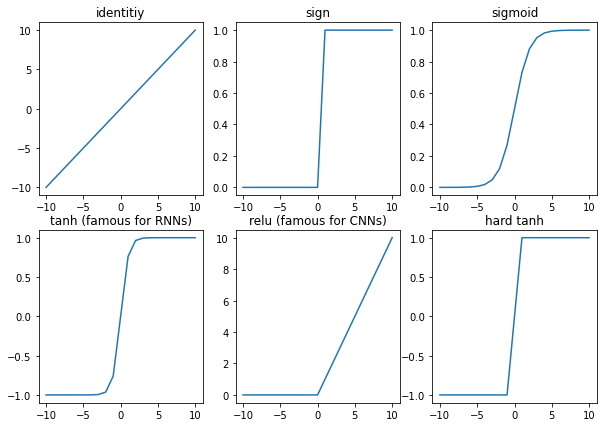

In [44]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3,figsize = (10,7))
x = range(-10,11)

identity_y = np.array(x)
sign_y = np.array([1 if point>0 else 0 for point in x ])
sigmoid_y = np.array(1/(1+np.exp(-np.array(x))))
tanh_y = np.array((np.exp(2 * np.array(x)) - 1)/(np.exp(2* np.array(x)) + 1))
relu_y = np.array([0 if point<0 else point for point in x])
hardtanh_y = np.array([maxp if maxp>-1 else -1 for maxp in [point if point<1 else 1 for point in np.array(x)]])


axs[0,0].plot(x,identity_y)
axs[0,0].set_title('identitiy')
axs[0,1].plot(x,sign_y)
axs[0,1].set_title('sign')
axs[0,2].plot(x,sigmoid_y)
axs[0,2].set_title('sigmoid')
axs[1,0].plot(x,tanh_y)
axs[1,0].set_title('tanh (famous for RNNs)')
axs[1,1].plot(x,relu_y)
axs[1,1].set_title('relu (famous for CNNs)')
axs[1,2].plot(x,hardtanh_y)
axs[1,2].set_title('hard tanh');

$$sign(z) = 
\begin{cases}
    -1,& \text{if } z<0\\
     1,& \text{else if } z>0\\
\end{cases}
$$

$$ sigmoid(z) = \frac{1}{1+\exp(-z)} $$

$$ tanh(z) = \frac{\exp(2z) - 1}{\exp(2z) + 1} = 2 sigmoid(2*z) -1 $$

$$ReLU(z) = \max(z,0)$$

$$hardtanh(z) = \max(\min(z,1),-1)$$

## Multilayer Perceptrons

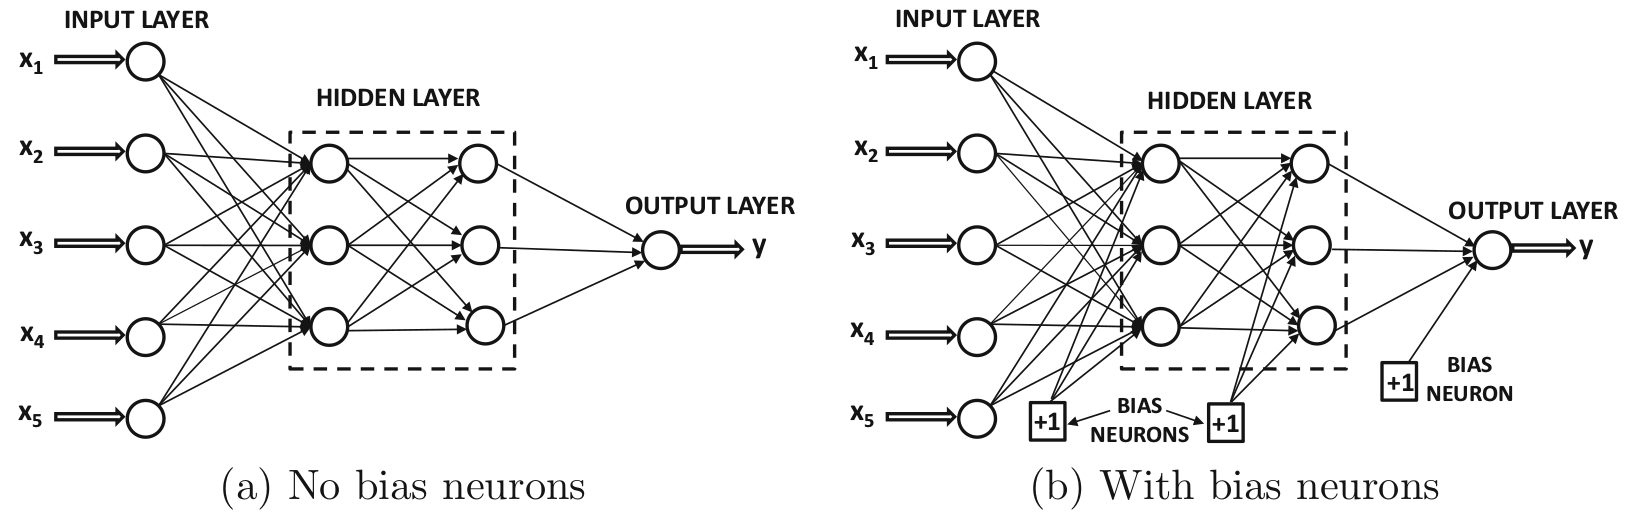

In [49]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/perceptron2.png",width=1200, height=1200)

The single layer perceptron is very useful for classifying data sets that are linearly separable.  They encounter serious limitations with data sets that do not conform to this pattern as discovered with the non-linear data.

The MultiLayer Perceptron (MLPs) breaks this restriction and classifies datasets which are not linearly separable.  They do this by using a more robust and complex architecture to learn regression and classification models for difficult datasets.



Let's compute the forward propagation on this multi layer network:

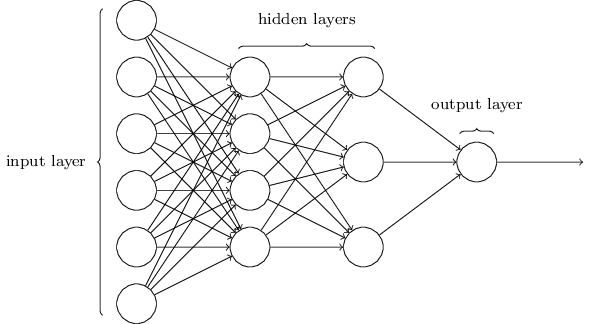

In [51]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/perceptron3.png",width=600, height=600)

We have 3 different weight matrices that are $w_1$, $w_2$, $w_3$ and bias terms $b_1$, $b_2$, $b_3$. Based on above network, we have 6 features in input data which is $n=6$ and $m$ samples.

$$ X = 
    \begin{bmatrix}
    x_1^{1} & x_2^{1} & x_3^{1} & x_4^{1} &x_5^{1} & x_6^{1}\\
    x_1^{2} & x_2^{2} & x_3^{2} & x_4^{2} &x_5^{2} & x_6^{2}\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    x_1^{m} & x_2^{m} & x_3^{m} & x_4^{m} &x_5^{m} & x_6^{m}\\
    \end{bmatrix}\;\;\;
    \in \mathbb{R^{m \times 6}}
$$

$$ w_1 = 
    \begin{bmatrix}
    w_1^{1} & w_2^{1} & w_3^{1} & w_4^{1} &w_5^{1} & w_6^{1}\\
    w_1^{2} & w_2^{2} & w_3^{2} & w_4^{2} &w_5^{2} & w_6^{2}\\
    w_1^{3} & w_2^{3} & w_3^{3} & w_4^{3} &w_5^{3} & w_6^{3}\\
    w_1^{4} & w_2^{4} & w_3^{4} & w_4^{4} &w_5^{4} & w_6^{4}\\
    \end{bmatrix}
    \in \mathbb{R^{4 \times 6}}
$$

$$ w_2 = 
    \begin{bmatrix}
    w_1^{1} & w_2^{1} & w_3^{1} & w_4^{1}\\
    w_1^{2} & w_2^{2} & w_3^{2} & w_4^{2}\\
    w_1^{3} & w_2^{3} & w_3^{3} & w_4^{3}\\
    \end{bmatrix}
    \in \mathbb{R^{3 \times 4}}
$$

$$ w_3 = 
    \begin{bmatrix}
    w_1^{1} & w_2^{1} & w_3^{1}\\
    \end{bmatrix}
    \in \mathbb{R^{1 \times 3}}
$$

Let's calculate hidden layers:

- $h_1$: dim = $(m \times 6) \times (6 \times 4) = (m \times 4)$

$$ z_1 = X w_1^t + b_1$$

$$ h_1 = \sigma(z_1)$$

- $h_2$: dim = $(m \times 4) \times (4 \times 3) = (m \times 3)$

$$ z_2 = h_1 w_2^T + b_2$$

$$ h_2 = \sigma(z_2)$$

- $\hat{y}$: $(m \times 3) \times (3 \times 1) = (m \times 1)$

$$ z_3 = h_2 w_3^T + b_3$$

$$ \hat{y} = h_3 = \sigma(z_3)$$


# Computational Graphs And Backpropagation Algorithm

## Defining Computational Graph

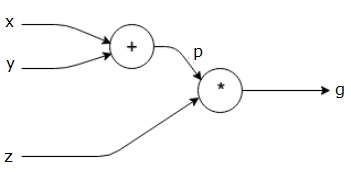

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/graph1.jpg",width=500, height=500)

A computational graph is defined as a directed graph where the nodes correspond to mathematical operations. Computational graphs are a way of expressing and evaluating a mathematical expression. Above computational graph corresponds:

$$ p = x + y$$

$$ g = p \times z $$

Also derivatives can be expressed with computational graphs.

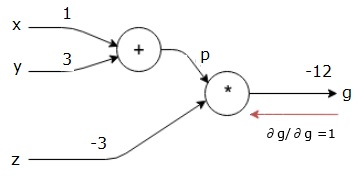

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/graph2.jpg",width=500, height=500)

$$ \frac{\partial g}{\partial g} = 1$$

$$ \frac{\partial g}{\partial z} = p = 4$$

$$ \frac{\partial g}{\partial p} = z = -3$$

$$ \frac{\partial g}{\partial x}=\frac{\partial g}{\partial p}\ast \frac{\partial p}{\partial x}$$

$$ \frac{\partial g}{\partial y}=\frac{\partial g}{\partial p}\ast \frac{\partial p}{\partial y}$$

$$p=x+y\Rightarrow \frac{\partial p}{\partial x} = 1, \frac{\partial p}{\partial y} = 1$$

$$ \frac{\partial g} {\partial x} = \frac{\partial g} {\partial p}\ast \frac{\partial p} {\partial x} = \left ( -3 \right ).1 = -3$$

$$ \frac{\partial g} {\partial y} = \frac{\partial g} {\partial p}\ast \frac{\partial p} {\partial y} = \left ( -3 \right ).1 = -3 $$